<a href="https://colab.research.google.com/github/zeylulbalci/dsa210project/blob/main/dsa210HypothesisTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Do movies with higher IMDb ratings earn more revenue on average?

**Null Hypothesis (H₀):** There is no difference in average box office revenue between high-rated and low-rated movies.

**Alternative Hypothesis (H₁):** Movies with higher IMDb ratings earn significantly more at the box office.

**Test Type:** Independent Samples T-test

# 2.Do movies with more YouTube likes earn more revenue?

**Null Hypothesis (H₀):** The average revenue of movies with high like counts on YouTube is equal to those with lower like counts.

**Alternative Hypothesis (H₁):** Movies with more YouTube likes tend to earn higher box office revenue.

**Test Type:** Independent Samples T-test

# 3. Is there a significant correlation between IMDb vote count and box office revenue?

**Null Hypothesis (H₀):** There is no correlation between the number of IMDb votes and gross revenue.

**Alternative Hypothesis (H₁):** There is a positive correlation between IMDb vote count and gross revenue.

**Test Type:** Pearson Correlation Coefficient



In [2]:
#Import necessary libraries
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Load final dataset (which includes IMDb rating and gross revenue)
df = pd.read_csv("IMDb___Gross_Dataset.csv")


In [4]:
#Convert Gross column from string to numeric if not already cleaned
df['Gross'] = df['Gross'].astype(str).str.replace(".", "", regex=False).str.replace(",", ".", regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors="coerce")


# Hypothesis Test 1: IMDb Rating vs Box Office Revenue
The goal of this test was to investigate whether movies with higher IMDb ratings earn more revenue than those with lower ratings.

To do this, I split the dataset into two groups based on the median IMDb rating:

One group contains movies with ratings above the median (High Rating)

The other group includes movies with ratings at or below the median (Low Rating)

An independent samples t-test was conducted to compare the average box office revenue of the two groups.

Results:
T-statistic: 2.2402

P-value: 0.0261

Since the p-value is less than 0.05, the result is statistically significant.
This means that I reject the null hypothesis (H₀)

In [5]:
#Separate films into two groups based on IMDb rating (above and below median)
rating_median = df['IMDb_Rating'].median()

high_rating = df[df['IMDb_Rating'] > rating_median]['Gross'].dropna()
low_rating = df[df['IMDb_Rating'] <= rating_median]['Gross'].dropna()


In [6]:
# 5. Perform Independent Samples T-Test to compare group means
t_stat, p_value = ttest_ind(high_rating, low_rating, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Reject H0 → IMDb rating is significantly related to higher revenue.")
else:
    print("Result: Fail to reject H0 → No significant difference in revenue based on IMDb rating.")


T-statistic: 2.2402
P-value: 0.0261
Result: Reject H0 → IMDb rating is significantly related to higher revenue.


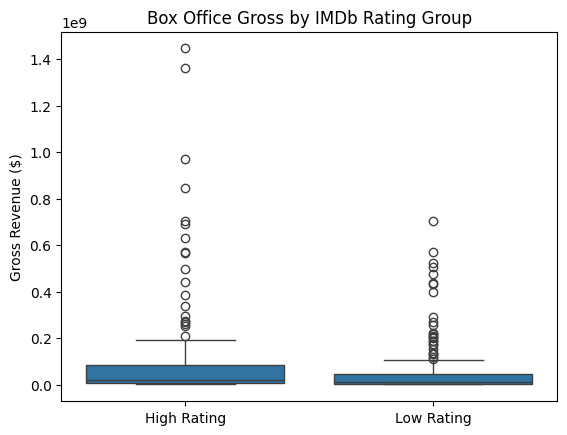

In [7]:
# Visualization of the distributions of revenue by rating group
sns.boxplot(x=['High Rating'] * len(high_rating) + ['Low Rating'] * len(low_rating),
            y=pd.concat([high_rating, low_rating], ignore_index=True))
plt.title("Box Office Gross by IMDb Rating Group")
plt.ylabel("Gross Revenue ($)")
plt.show()


# Hypothesis Test 2: YouTube Likes vs Box Office Revenue
The purpose of this test was to examine whether movies with a higher number of YouTube likes on their trailers tend to generate more revenue at the box office.

To assess this, I divided the dataset into two groups based on the median number of YouTube likes:

The High Likes group includes movies whose trailer received more likes than the median.

The Low Likes group includes movies with like counts equal to or below the median.

An independent samples t-test was conducted to compare the average gross revenue between these two groups.

Results:
T-statistic: 6.8796

P-value: 0.0000

Decision: Reject H₀ → YouTube likes are significantly associated with higher revenue.

The results provide strong evidence that movies with more likes on their trailers tend to earn significantly more at the box office. The extremely low p-value (well below 0.05) suggests that this relationship is not due to random chance. This supports the idea that online engagement on YouTube — in the form of likes — can serve as a strong indicator of commercial success.

Studios might consider actively promoting trailers and encouraging viewer engagement as part of their marketing strategy. However, further investigation would be needed to determine whether likes cause revenue increases, or whether both are influenced by other factors.

In [8]:
from scipy.stats import ttest_ind

# Calculate median of Likes to define 'high like' group
likes_median = df['Likes'].median()

# Split into two groups
high_likes = df[df['Likes'] > likes_median]['Gross'].dropna()
low_likes = df[df['Likes'] <= likes_median]['Gross'].dropna()

# T-Test
t_stat, p_value = ttest_ind(high_likes, low_likes, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Reject H0 → YouTube likes are significantly associated with higher revenue.")
else:
    print("Result: Fail to reject H0 → No significant relationship between likes and revenue.")


T-statistic: 6.8796
P-value: 0.0000
Result: Reject H0 → YouTube likes are significantly associated with higher revenue.


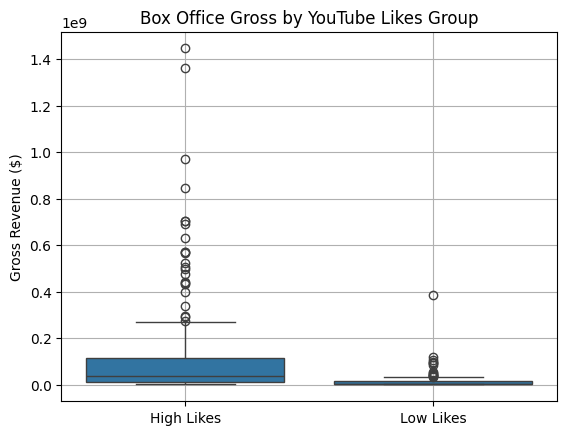

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for likes vs gross
sns.boxplot(x=['High Likes'] * len(high_likes) + ['Low Likes'] * len(low_likes),
            y=pd.concat([high_likes, low_likes], ignore_index=True))

plt.title("Box Office Gross by YouTube Likes Group")
plt.ylabel("Gross Revenue ($)")
plt.grid(True)
plt.show()


# Hypothesis Test 3: IMDb Vote Count vs Box Office Revenue
The objective of this test was to determine whether movies with higher numbers of IMDb votes generate more box office revenue than those with fewer votes.

To perform this analysis, I first calculated the median number of votes across all movies. Then, I divided the dataset into two groups:

High Votes: movies with vote counts above the median

Low Votes: movies with vote counts at or below the median

An independent samples t-test was then applied to compare the average gross revenue of these two groups.

Results:

T-statistic: 6.5969

P-value: 0.0000

Since the p-value is well below the significance threshold of 0.05, we reject the null hypothesis (H₀). This result indicates a statistically **significant relationship** between the **number of IMDb votes and a movie's box office revenue**. Movies with more audience engagement in the form of votes are more likely to perform better financially.



In [36]:
df = pd.read_csv("IMDb___Gross_Dataset.csv")


In [37]:
# Making the column to string type first
df['numVotes'] = df['numVotes'].astype(str)

# Remove dots and convert comma to dot
df['numVotes'] = df['numVotes'].str.replace(".", "", regex=False).str.replace(",", ".", regex=False)

#Convert to float
df['numVotes'] = pd.to_numeric(df['numVotes'], errors='coerce')


In [38]:
print(df['numVotes'].dtype)
print(df['numVotes'].isnull().sum())
print(df['numVotes'].describe())


float64
89
count    3.230000e+02
mean     5.254763e+05
std      9.798540e+05
min      1.900000e+02
25%      9.620000e+03
50%      8.669000e+04
75%      6.902250e+05
max      8.832450e+06
Name: numVotes, dtype: float64


In [39]:
# Convert 'numVotes' to string first (if needed), then clean
df['numVotes'] = df['numVotes'].astype(str).str.replace(".", "", regex=False).str.replace(",", ".", regex=False)

# Convert to float
df['numVotes'] = pd.to_numeric(df['numVotes'], errors='coerce')

# removing na
df = df.dropna(subset=['numVotes'])


In [40]:
#Converting 'numVotes' and 'Gross' to numeric (in case they are still strings)
df['numVotes'] = pd.to_numeric(df['numVotes'], errors='coerce')
df['Gross'] = df['Gross'].str.replace(".", "", regex=False).str.replace(",", ".", regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')


In [41]:
print("dtype of numVotes:", df['numVotes'].dtype)
print("dtype of Gross:", df['Gross'].dtype)
print("NaN in numVotes:", df['numVotes'].isna().sum())
print("NaN in Gross:", df['Gross'].isna().sum())
print(df[['numVotes', 'Gross']].head())


dtype of numVotes: float64
dtype of Gross: float64
NaN in numVotes: 0
NaN in Gross: 0
     numVotes         Gross
0  60513000.0  1.445638e+09
1  26719100.0  1.362034e+09
2  88324500.0  9.724448e+08
3  42609500.0  8.455558e+08
4  13456800.0  7.048750e+08


In [42]:
# Drop rows with missing or invalid values
df = df.dropna(subset=['numVotes', 'Gross'])

# Median grouping
median_votes = df['numVotes'].median()
df['VoteGroup'] = df['numVotes'].apply(lambda x: 'High Votes' if x > median_votes else 'Low Votes')

# T-test
from scipy.stats import ttest_ind
high_votes = df[df['VoteGroup'] == 'High Votes']['Gross']
low_votes = df[df['VoteGroup'] == 'Low Votes']['Gross']

t_stat, p_value = ttest_ind(high_votes, low_votes, nan_policy='omit')

print("T-statistic:", round(t_stat, 4))
print("P-value:", round(p_value, 4))


T-statistic: 6.5969
P-value: 0.0
